In [9]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Week 5 Discussion - Odds and Probabilities
I figured for this week's discussion, I'd stay away from the obvious election related odds that are all over the news.

Instead, I chose to sort of revisit last week’s topic of the Powerball lottery. In particular, I wanted to look at the probability of a few events that are more likely to happen to me than winning the Powerball. Remember from last week that the odds of winning the Powerball jackpot are roughly 1 in 292 million.

To help with this task, I found this [article from Time.com](ttp://time.com/4171474/powerball-lottery-more-likely-win/) which lists 10 things ‘that are more likely to occur than winning the lottery’, based on [‘The Book of Odds'](http://www.amazon.com/The-Book-Odds-Lightning-Everyday/dp/0062060856).

**Some examples:**

1. Dying from an asteroid strike: 1 in 74,817,414
2. Getting killed by a terrorist act in the United States: 1 in 10,000,000
3. Getting murdered during a trip to the Grand Canyon: 1 in 8,156,000
4. Dying from chronic constipation: 1 in 2,215,900
5. Becoming a movie star: 1 in 1,505,000
6. Getting struck by lightning: 1 in 1,101,000
7. Dying from a hornet, wasp or bee sting: 1 in 79,842
8. Bowling a 300 game: 1 in 11,500
9. Being the same height as actor Hugh Jackman, who is 6-foot-2: 1 in 23.3
10. Becoming disabled, disfigured or killed by a parasite: 1 in 7.2

Let’s take a look at a couple of these to see if we can reproduce the odds using data we can find publicly.

### To start - Getting Struck by Lightning.

The National Weather Service has some [helpful stats on this topic](http://www.lightningsafety.noaa.gov/odds.shtml) for 2003-2014. Given a US population estimate of 318 million, and a reported 267 total deaths and injuries from lightning strike, we can calculate the odds of being struck as 267/318,000,000, or about 1 in 1,191,000. So, our calculated odds are only slightly lower than the article’s stated 1 in 1,101,000, which is likely due to a difference in sample data. Since we're very close though, I'm content with our result here. 

### Being the same height as actor Hugh Jackman
Another one that seemed interesting is \#9, the odds of being the same height as actor Hugh Jackman, 1 in 23.3. Height being a biological measurement, it should [follow a normal](http://www.johndcook.com/blog/2008/07/20/why-heights-are-normally-distributed/) (Gaussian) distribution. So, calculating the odds of being exactly a certain height, would entail generating a normal probability distribution and getting the probability of 6’2”. We can use Python and scipy to do this.

If we assume an [average height of 69.7 inches](http://halls.md/average-height-men-height-weight/) for a man, we can back into fitting a normal distribution for heights:

In [10]:
heights_range = np.arange(4.6*12.0, 7*12.0+1, 1.0)
avg_height = heights_range.mean()
sd = heights_range.std()
print avg_height, sd

69.7 8.6554414484


In [11]:
rv = norm(avg_height, sd)
heights_dist = np.random.normal(avg_height, sd, size=100000)

The following graph shows us that our generated data neatly follows a normal distribution (bell curve), centered around our mean of 69.7 inches.

[]

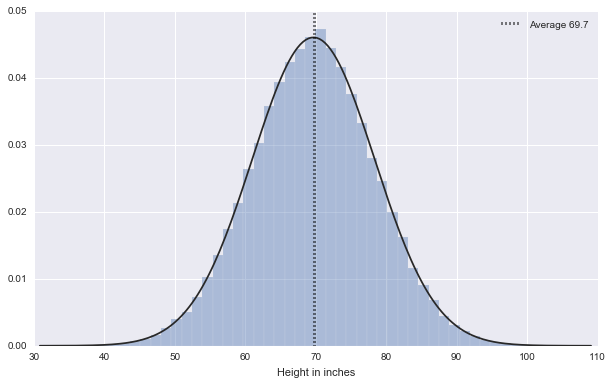

In [12]:
import seaborn as sns
sns.set(rc={"figure.figsize": (9, 6)})
ax = sns.distplot(heights_dist, fit=norm, kde=False, axlabel='Height in inches')
ax.axvline(x=avg_height, linewidth=3, color = 'k', linestyle='dotted', label='Average {0}'.format(avg_height))
ax.legend()
ax.plot()

So, for example, for the average height of **69.7 inches**, we can calculate a probability of **4.6%**, or **1 in 21.7** of a man being of average height.

In [13]:
print avg_height
prob = rv.pdf(avg_height)
print prob
print '1 in', round(1/prob, 1)

69.7
0.046091500102
1 in 21.7


Given Hugh Jackman’s height of 6’2”, we calculate a probability of being his height of **4.07%, or 1 in 24.5**, which is only slightly lower than our target of 1 in 23.3. The difference is likely explained by the author’s (or their source’s) choice of distribution parameters.

In [14]:
hugh_jackman = 6.0*12+2 
print hugh_jackman
prob = rv.pdf(hugh_jackman)
print prob
print '1 in', round(1/prob, 1)

74.0
0.0407405850574
1 in 24.5


For fun, we can also check the probability of being as tall as [Wolverine](http://marvel.com/characters/66/wolverine), Hugh Jackman’s character in X-Men, who (oddly) is almost a foot shorter in the comic books:

In [15]:
wolverine = 5.0*12+3 
print wolverine
prob = rv.pdf(wolverine)
print prob
print '1 in', round(1/prob, 1)

63.0
0.034159099194
1 in 29.3


Thus, a boy has about a **1 in 29.3** chance of growing up to be as tall as Wolverine. There is your cocktail party trivia for the week.

Lastly, we can update our distribution plot from earlier with our additional values of interest:

[]

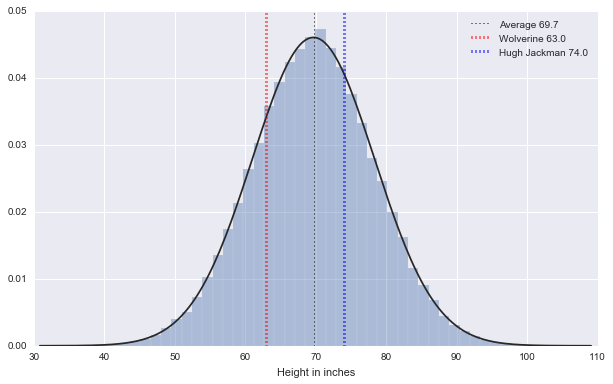

In [16]:
import seaborn as sns
sns.set(rc={"figure.figsize": (9, 6)})
ax = sns.distplot(heights_dist, fit=norm, kde=False, axlabel='Height in inches')
ax.axvline(x=avg_height, linewidth=1, color = 'k', linestyle='dotted', label='Average {0}'.format(avg_height))
ax.axvline(x=wolverine, linewidth=3, color = 'r', linestyle='dotted', label='Wolverine {0}'.format(wolverine))
ax.axvline(x=hugh_jackman, linewidth=3, color = 'b', linestyle='dotted', label='Hugh Jackman {0}'.format(hugh_jackman))
ax.legend()
ax.plot()